# By: Seher Mubeen

## The spasrks foundation

### task 1 prediction using supervised ML

#### Predict the percentage of an student based on the no. of study hours. 

In [1]:
greetings = 'Assalam o Alaikum: welcome to my work'
print(greetings)

Assalam o Alaikum: welcome to my work


# import some important ibraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  
print("import libraries succesfully")

import libraries succesfully


# data read 

In [2]:
data_set = 'http://bit.ly/w-data'
data = pd.read_csv(data_set)
df = data.copy()
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
df.head() #by default it only shows the first 5 value of data set u can change it by yourself

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.tail() #by default it only shows the last 5 value of data set u can change it by yourself

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [97]:
#check null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [96]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.describe() #it describe the statistical summary of our data set

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [3]:
cor = df.corr() # correlation between hours and scores
cor 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


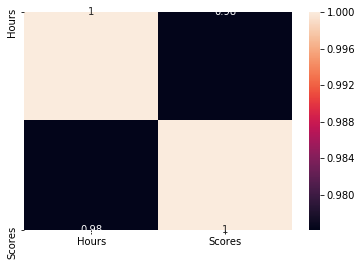

In [4]:
heat_map =sns.heatmap(cor,annot = True) #clearly shows that they are higly correlated
heat_map

#check linearRegression between these features

Text(0.5, 1.0, 'Hours / scores')

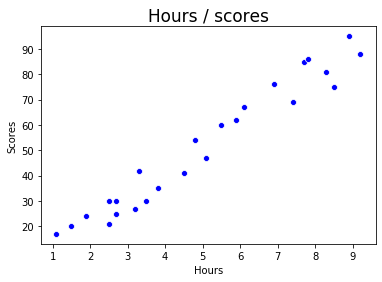

In [105]:
scatter = sns.scatterplot(df['Hours'],df['Scores'] , data = df, color = 'blue',marker = 'o')
plt.title('Hours / scores',size = 17) # hence we can see that there is positive corrleation between points

Regression line passing through the data points

# preparation of data

In [76]:
X = df.drop(['Scores'] , axis = 1)
y = df['Scores'] # targeted feature

data split into parts for testing and training

In [65]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y =  train_test_split(X,y, test_size = 0.2 , random_state =0)

# linear regression algorithm

In [66]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [67]:
lr_model.fit(train_x,train_y)
print(test_x)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [68]:
pred = lr_model.predict(test_x)
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#comapring actual vs predicted

In [69]:
compare = pd.DataFrame({'actual':test_y,'predicted':pred})
compare

,actual,predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


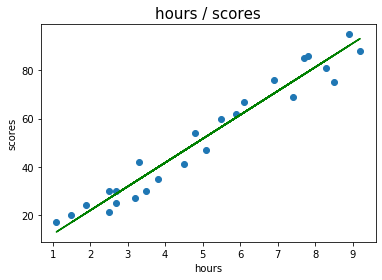

In [115]:
#Plotting the regression line
line = lr_model.coef_*X+lr_model.intercept_ # y = mx +c
# Plotting for the test data
plt.scatter(X, y)
plt.title('hours / scores' ,size = 15)
plt.xlabel("hours")
plt.ylabel("scores")
plt.plot(X, line,color = 'green')
plt.show()

# make prediction

In [75]:
hours = 9.25
score = lr_model.predict([[hours]])
print("no of hours = {}  ".format(hours))
print("predicted scrores are = {}  ".format(score[0]))

no of hours = 9.25  
predicted scrores are = 93.69173248737538  


# evalution of model
The final step is to evaluate the performance of algorithm. This step is important to compare the different algorithms performance on a particular dataset.

1.Mean Absolute Error
The Mean Absolute Error (or MAE) is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were.

In [112]:
from sklearn.metrics import mean_absolute_error
mean =  mean_absolute_error(test_y,pred)
mean

4.183859899002975

2.Mean Squared Error
The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error.

In [113]:
from sklearn.metrics import mean_squared_error
sqrd =  mean_squared_error(test_y,pred)
sqrd

21.5987693072174

3. R^2 Metric
The R^2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination.
This is a value between 0 and 1 for no-fit and perfect fit respectively.

In [114]:
from sklearn.metrics import r2_score
coefiiecent_of_determination =  r2_score(test_y,pred)
coefiiecent_of_determination

0.9454906892105356

thanx sparks foundation